[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmazidi/NLP/blob/master/Part_5-Machine-Learning/Chapter_21_LogReg/sarcasm.ipynb)

###### Code accompanies *Natural Language Processing* by KJG Mazidi, all rights reserved.

# Detecting sarcasm

This notebook uses Naive Bayes and Logistic Regression to detect sarcasm in a data set compiled by Rishabh Misra and Prahal Arora. The link to the data is provided below. In [their paper](https://arxiv.org/pdf/1908.07414.pdf) the authors decribe a hybrid neural network over this network which achieved an accuracy of 89.7% which is higher than the 84.5% accuracy achieved by the Naive Bayes approach in this notebook.

[Link to data](https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection)



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt # for word cloud
import seaborn as sb
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix


In [7]:
# run this code block if on a local computer

df = pd.read_json('../data/Sarcasm_Headlines_Dataset.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [ ]:
# for colab only

from google.colab import files
uploaded = files.upload()

In [ ]:
# for colab only

import io
df = pd.read_json(io.BytesIO(uploaded['Sarcasm_Headlines_Dataset.json']), lines=True)
df.head()

In [8]:
df.dtypes

is_sarcastic     int64
headline        object
article_link    object
dtype: object

In [9]:
df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

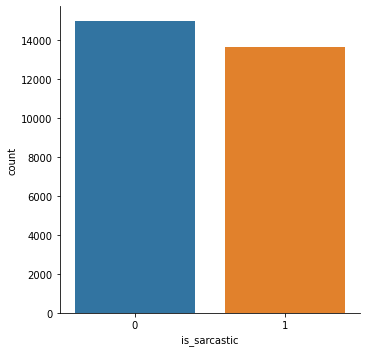

In [10]:
# plot distribution of classes
sb.catplot(x="is_sarcastic", kind="count", data=df)

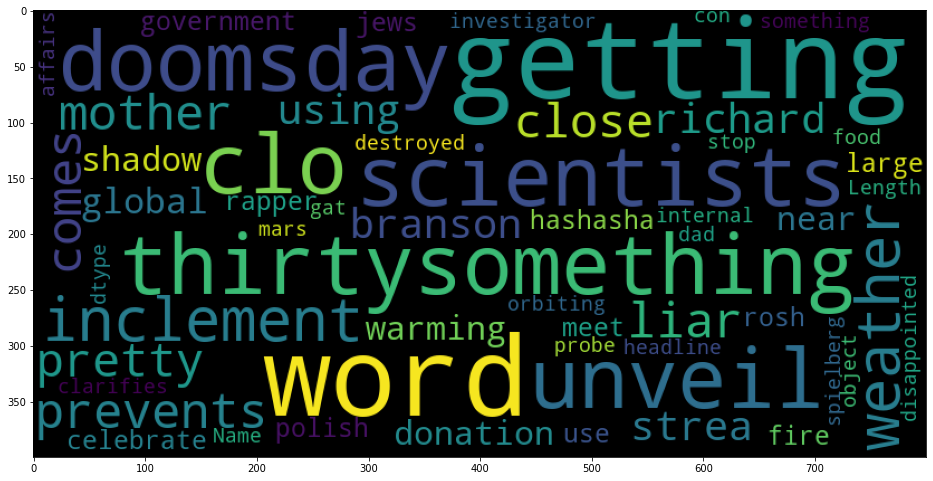

In [11]:
#pip or pip3 install wordcloud

from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 100, max_font_size = 100, 
                random_state = 15, width=800, height=400)

plt.figure(figsize=(16, 12))
wordcloud.generate(str(df.loc[df['is_sarcastic'] == 1, 'headline']))
plt.imshow(wordcloud)

In [12]:
# tf-idf processing and train-test split

X = df.headline
y = df.is_sarcastic

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
X_train.shape


(21464,)

In [13]:
# tfidf vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)

X_train = vectorizer.fit_transform(X_train)  # fit and transform the train data
X_test = vectorizer.transform(X_test)        # transform only the test data

In [14]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
pred = nb.predict(X_test)

In [16]:
confusion_matrix(y_test, pred)

array([[3375,  448],
       [ 608, 2724]])

In [17]:
accuracy_score(y_test, pred)

0.8524109014675052

In [36]:
clf = LogisticRegression(C=2.5, n_jobs=4, solver='lbfgs', random_state=17, verbose=1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=17,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)

In [37]:
pred2 = clf.predict(X_test)

In [38]:
confusion_matrix(y_test, pred2)

array([[3261,  562],
       [ 501, 2831]])

In [39]:
accuracy_score(y_test, pred2)

0.8514325646401119